# Распознавание лиц


Для правильной тренировки необходимо использовать миллионы изображений, и это занимает много времени даже с десятками дорогих графических процессоров.

Вот почему методы, которые не требуют переподготовки на таких больших наборах данных, очень полезны. Трансферное обучение и эмбеддинг являются такими методами.

Методы глубокого обучения требуют много данных для каждого человека. На практике эти данные не всегда доступны.

In [1]:
import tensorflow as tf
import keras
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras import backend as K
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
K.clear_session()
from project.dg_face import utils, detection, alignment

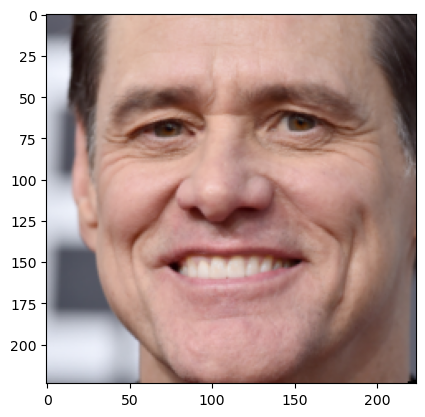

In [2]:
# image = utils.load_image("belikov.jpg")
image = utils.load_image("carrey.jpg")
faces = detection.detect_faces(image)
aligned_face = alignment.aligned_face(image, faces[0])
plt.imshow(aligned_face)
plt.show()

# VGG16
Распознавание основанное на модели VGG16 (2015)
<img src="notebook_images/vgg_model.png" width="1000"/>
*Архитектура модели*

In [3]:
model = VGGFace(include_top=False, model='vgg16', input_shape=(224, 224, 3), pooling='avg')
model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

## Получение эмбеддинга

In [4]:
model = VGGFace(include_top=False, model='vgg16', input_shape=(224, 224, 3), pooling='avg')
img = preprocess_input(aligned_face.astype(float), version=1)
encoding = model.predict(np.array([img]))[0]
encoding

1/1 [==============================] - 8s 8s/step


array([4.90226507e+00, 5.14979887e+00, 1.87848878e+00, 7.82582140e+00,
       4.39237468e-02, 9.61701930e-01, 1.81139898e+00, 1.03818989e+00,
       1.34107389e+01, 2.96512341e+00, 3.44969082e+00, 2.14720702e+00,
       4.65532690e-01, 3.36754632e+00, 1.76019268e+01, 2.14728165e+00,
       0.00000000e+00, 5.51819849e+00, 0.00000000e+00, 1.85140085e+00,
       1.05141437e+00, 1.12956810e+00, 4.74845886e+00, 6.41277504e+00,
       1.17507815e+00, 2.69065690e+00, 1.87365010e-01, 5.92601478e-01,
       1.46916151e+00, 9.01714265e-01, 1.15901220e+00, 2.96531367e+00,
       5.92680264e+00, 1.47469950e+00, 3.48917842e+00, 7.57747030e+00,
       3.75025320e+00, 2.56282616e+00, 9.26373720e-01, 2.05222464e+00,
       8.68426800e+00, 8.07758093e-01, 1.97309399e+00, 9.78354931e-01,
       9.70519257e+00, 3.07283497e+00, 8.70872021e+00, 4.15690124e-01,
       3.56739402e+00, 2.37686110e+00, 2.15441298e+00, 4.27893579e-01,
       5.77677228e-02, 0.00000000e+00, 3.57371616e+00, 2.12873197e+00,
      

In [12]:
print(encoding)

[4.90226507e+00 5.14979887e+00 1.87848878e+00 7.82582140e+00
 4.39237468e-02 9.61701930e-01 1.81139898e+00 1.03818989e+00
 1.34107389e+01 2.96512341e+00 3.44969082e+00 2.14720702e+00
 4.65532690e-01 3.36754632e+00 1.76019268e+01 2.14728165e+00
 0.00000000e+00 5.51819849e+00 0.00000000e+00 1.85140085e+00
 1.05141437e+00 1.12956810e+00 4.74845886e+00 6.41277504e+00
 1.17507815e+00 2.69065690e+00 1.87365010e-01 5.92601478e-01
 1.46916151e+00 9.01714265e-01 1.15901220e+00 2.96531367e+00
 5.92680264e+00 1.47469950e+00 3.48917842e+00 7.57747030e+00
 3.75025320e+00 2.56282616e+00 9.26373720e-01 2.05222464e+00
 8.68426800e+00 8.07758093e-01 1.97309399e+00 9.78354931e-01
 9.70519257e+00 3.07283497e+00 8.70872021e+00 4.15690124e-01
 3.56739402e+00 2.37686110e+00 2.15441298e+00 4.27893579e-01
 5.77677228e-02 0.00000000e+00 3.57371616e+00 2.12873197e+00
 4.51514816e+00 1.66112232e+00 5.59568548e+00 1.24340370e-01
 2.05517769e+00 8.50167942e+00 1.71358347e+00 5.45315504e+00
 0.00000000e+00 3.667828

# Другие варианты сетей

In [ ]:
vggface = VGGFace(model='resnet50')
vggface = VGGFace(model='senet50')